<a href="https://colab.research.google.com/github/HasanF19/Fuzzy-Algorithm-Test/blob/main/Fuzzy_Algorithm_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#220212002 Hasan Fatih Öztürk Fuzzy Algoritması çalışması

In [ ]:
!pip install scikit-fuzzy

In [ ]:
# Hücre 1
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
# Hücre 2

# Girişler: Hedefe göre x ve y hatası
error_x = ctrl.Antecedent(np.arange(-4, 4.1, 0.1), 'error_x')
error_y = ctrl.Antecedent(np.arange(-4, 4.1, 0.1), 'error_y')

# Çıkışlar: q1 ve q2 açı değişimi (derece)
delta_q1 = ctrl.Consequent(np.arange(-15, 16, 1), 'delta_q1')
delta_q2 = ctrl.Consequent(np.arange(-15, 16, 1), 'delta_q2')

# Üyelik fonksiyonları
error_x['N'] = fuzz.trimf(error_x.universe, [-4, -4, 0])
error_x['Z'] = fuzz.trimf(error_x.universe, [-1, 0, 1])
error_x['P'] = fuzz.trimf(error_x.universe, [0, 4, 4])

error_y['N'] = fuzz.trimf(error_y.universe, [-4, -4, 0])
error_y['Z'] = fuzz.trimf(error_y.universe, [-1, 0, 1])
error_y['P'] = fuzz.trimf(error_y.universe, [0, 4, 4])

delta_q1['N'] = fuzz.trimf(delta_q1.universe, [-15, -15, 0])
delta_q1['Z'] = fuzz.trimf(delta_q1.universe, [-5, 0, 5])
delta_q1['P'] = fuzz.trimf(delta_q1.universe, [0, 15, 15])

delta_q2['N'] = fuzz.trimf(delta_q2.universe, [-15, -15, 0])
delta_q2['Z'] = fuzz.trimf(delta_q2.universe, [-5, 0, 5])
delta_q2['P'] = fuzz.trimf(delta_q2.universe, [0, 15, 15])


In [ ]:
# Hücre 4

rule1 = ctrl.Rule(error_x['P'] & error_y['P'], (delta_q1['P'], delta_q2['N']))
rule2 = ctrl.Rule(error_x['N'] & error_y['P'], (delta_q1['N'], delta_q2['N']))
rule3 = ctrl.Rule(error_x['P'] & error_y['N'], (delta_q1['P'], delta_q2['P']))
rule4 = ctrl.Rule(error_x['N'] & error_y['N'], (delta_q1['N'], delta_q2['P']))
rule5 = ctrl.Rule(error_x['Z'] & error_y['Z'], (delta_q1['Z'], delta_q2['Z']))

fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_ctrl)


In [ ]:
# Hücre 5

a1 = 3   # 1. kol uzunluğu
a2 = 1   # 2. kol uzunluğu

target_x = 0
target_y = 2

# Başlangıç açıları (derece cinsinden)
q1 = 0.0
q2 = 0.0


Adım 1:
  Uç pozisyonum: x=0.00, y=2.98
  Hedef hata: Δx=-0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=-0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 2:
  Uç pozisyonum: x=0.00, y=2.98
  Hedef hata: Δx=-0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=-0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 3:
  Uç pozisyonum: x=0.00, y=2.98
  Hedef hata: Δx=-0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=-0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 4:
  Uç pozisyonum: x=-0.00, y=2.98
  Hedef hata: Δx=0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 5:
  Uç pozisyonum: x=-0.00, y=2.98
  Hedef hata: Δx=0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 6:
  Uç pozisyonum: x=0.00, y=2.98
  Hedef hata: Δx=0.00, Δy=-0.98
  Bulanık mantık çıkışı: dq1=0.00, dq2=0.00
  Yeni açı değerleri: q1=109.25, q2=-100.77
Adım 7:
  Uç pozisyonum: x=0.00,

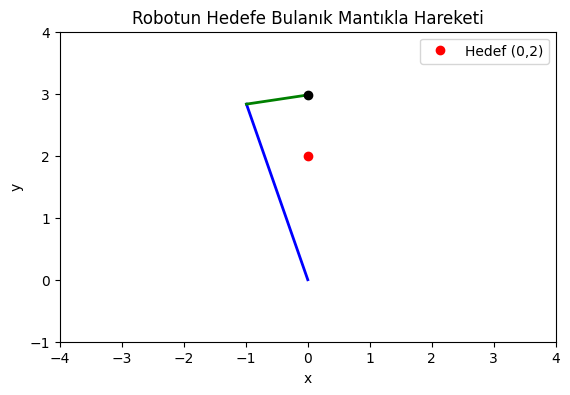

AttributeError: property 'lines' of 'Axes' object has no setter

In [ ]:
# Hücre 5

q1_list = []
q2_list = []
x_list = []
y_list = []

for i in range(850):  # Adım sayısını artırabilirsin
    x = a1 * np.cos(np.radians(q1)) + a2 * np.cos(np.radians(q1 + q2))
    y = a1 * np.sin(np.radians(q1)) + a2 * np.sin(np.radians(q1 + q2))

    errorx = target_x - x
    errory = target_y - y
    dist = np.sqrt(errorx**2 + errory**2)

    fuzzy_sim.input['error_x'] = errorx
    fuzzy_sim.input['error_y'] = errory
    fuzzy_sim.compute()

    dq1 = fuzzy_sim.output['delta_q1']
    dq2 = fuzzy_sim.output['delta_q2']

    # Küçük adımlarla güncelle (güvenli çarpan)
    q1 += dq1 * 0.08
    q2 += dq2 * 0.08

    # Yeni pozisyonu hesapla
    new_x = a1 * np.cos(np.radians(q1)) + a2 * np.cos(np.radians(q1 + q2))
    new_y = a1 * np.sin(np.radians(q1)) + a2 * np.sin(np.radians(q1 + q2))
    new_dist = np.sqrt((target_x - new_x)**2 + (target_y - new_y)**2)

    # Eğer uzaklaşırsa, değişimi tersle
    if new_dist > dist:
        q1 -= 2 * dq1 * 0.08
        q2 -= 2 * dq2 * 0.08

    q1_list.append(q1)
    q2_list.append(q2)
    x_list.append(x)
    y_list.append(y)

    print(f"Adım {i+1}:")
    print(f"  Uç pozisyonum: x={x:.2f}, y={y:.2f}")
    print(f"  Hedef hata: Δx={errorx:.2f}, Δy={errory:.2f}")
    print(f"  Bulanık mantık çıkışı: dq1={dq1:.2f}, dq2={dq2:.2f}")
    print(f"  Yeni açı değerleri: q1={q1:.2f}, q2={q2:.2f}")

    if abs(errorx) < 0.05 and abs(errory) < 0.05:
        print("\nHEDEFE ULAŞTIM!")#ne yazıkki ulaşamadık ve çıktıyı göremedik
        break

#iki hücrede kodu tekrar tekrar çalıştırmak zor olduğu için hücreler birleştirilmiştir
# Hücre 6

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Robotun Hedefe Bulanık Mantıkla Hareketi")
plt.plot(target_x, target_y, 'ro', label='Hedef (0,2)')
plt.legend()

for j in range(len(q1_list)):
    q1_deg = q1_list[j]
    q2_deg = q2_list[j]
    x0, y0 = 0, 0
    x1 = a1 * np.cos(np.radians(q1_deg))
    y1 = a1 * np.sin(np.radians(q1_deg))
    x2 = x1 + a2 * np.cos(np.radians(q1_deg + q2_deg))
    y2 = y1 + a2 * np.sin(np.radians(q1_deg + q2_deg))
    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=2)
    ax.plot([x1, x2], [y1, y2], 'g-', linewidth=2)
    ax.plot(x2, y2, 'ko')
    plt.pause(0.4)
    if j != len(q1_list) - 1:
        ax.lines = ax.lines[:1]

plt.show()


##Sonuç-1

Fuzzy algorithm kullanarak hedefe ulaşamadık algoritmayı tekrar tekrar deneyerek güncelledikten sonra hedefe en yakın çıktı olarak 1500. tekrarda dahi ulaştığımız son çıktının resmini görmektesiniz. Robotun bir yerden sonra hareketsiz kalmasının sebebi parametreleri ayarlarken q2 ve q1 birlikte arttırarak mesafe ölçelim eğer mesafe uzaklaşmaya başlarsa q2 azalt q1 arttır demiş olmamdan kaynaklanmaktadır. Diğer ihtimalleri de denememe rahmen 0.8 çarpan ile daha kaliteli bir çıktıya ulaşamadık çünkü okul numaramın 02 ile bitmesi 3e 1 uzunluğunda bir kolun q1de x ekseni ile +90 q2 de +270 derece tam açı yapmasını gerektirmektedir ve bu geometrik olarak tam karşılayan bir netlik olsa da fuzzy ile sağlanamamıştır. Saygılar

#sonradan gelen güncelleme

q1 ve q2 fonksiyonları için sırasıyla arttır-arttır ve arttır-azalt kullandım fakat son noktada azalt-azalt yaparak sonuca ulaşabileceğimi düşünüyorum. Ek kombinasyon olarak çıktı süresince azalt-arttır da denenebilir kodun son kısmında parametreleri sıfırlayıp tekrardan çıktı alacağım.

In [ ]:
a1 = 3
a2 = 1
target_x = 0
target_y = 2

q1 = 0.0
q2 = 0.0


 Sonunda hedefe ulaşıldı! q1=85.00, q2=170.00


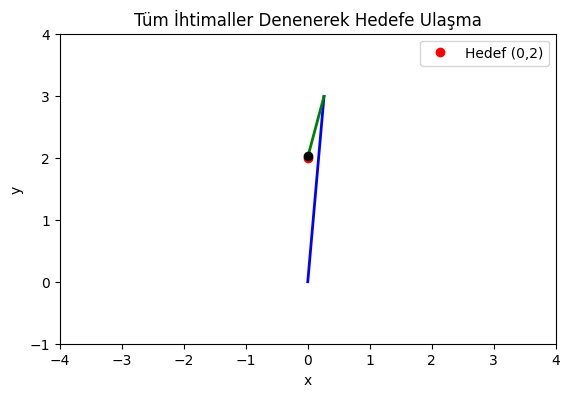

In [ ]:

# Kayıt için
q1_list = []
q2_list = []
x_list = []
y_list = []

def get_end_effector(q1, q2):
    x = a1 * np.cos(np.radians(q1)) + a2 * np.cos(np.radians(q1 + q2))
    y = a1 * np.sin(np.radians(q1)) + a2 * np.sin(np.radians(q1 + q2))
    return x, y

for step in range(50):
    options = []
    actions = [
        (+1, +1),  # q1 arttır, q2 arttır
        (-1, -1),  # q1 azalt, q2 azalt
        (+1, -1),  # q1 arttır, q2 azalt
        (-1, +1),  # q1 azalt, q2 arttır
        (0, +1),   # sadece q2 arttır
        (0, -1),   # sadece q2 azalt
        (+1, 0),   # sadece q1 arttır
        (-1, 0),   # sadece q1 azalt
        (0, 0)     # hiç değişme (gerekiyor)
    ]
    step_size = 1  # veya 0.8, 1 derece gibi küçük bir değer

    for dq1_sign, dq2_sign in actions:
        temp_q1 = q1 + dq1_sign * step_size
        temp_q2 = q2 + dq2_sign * step_size
        x, y = get_end_effector(temp_q1, temp_q2)
        dist = np.sqrt((target_x - x)**2 + (target_y - y)**2)
        options.append((dist, temp_q1, temp_q2))

    # En kısa mesafeyi bul
    best = min(options, key=lambda t: t[0])
    q1 = best[1]
    q2 = best[2]
    x, y = get_end_effector(q1, q2)
    q1_list.append(q1)
    q2_list.append(q2)
    x_list.append(x)
    y_list.append(y)

    # Yeterince yakınsa kır
    if best[0] < 0.03:
        print(f" Sonunda hedefe ulaşıldı! q1={q1:.2f}, q2={q2:.2f}")
        break

# Son animasyon
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Tüm İhtimaller Denenerek Hedefe Ulaşma")
plt.plot(target_x, target_y, 'ro', label='Hedef (0,2)')
plt.legend()
for j in range(len(q1_list)):
    q1_deg = q1_list[j]
    q2_deg = q2_list[j]
    x0, y0 = 0, 0
    x1 = a1 * np.cos(np.radians(q1_deg))
    y1 = a1 * np.sin(np.radians(q1_deg))
    x2 = x1 + a2 * np.cos(np.radians(q1_deg + q2_deg))
    y2 = y1 + a2 * np.sin(np.radians(q1_deg + q2_deg))
    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=2)
    ax.plot([x1, x2], [y1, y2], 'g-', linewidth=2)
    ax.plot(x2, y2, 'ko')
    plt.pause(0.01)
    if j != len(q1_list) - 1:
        ax.lines = ax.lines[:1]
plt.show()


Sonunda hedefe ulaşıldı! q1=85.00, q2=170.00

Yukarıdaki mesaj başardığımızı gösteriyor plot gösterimi olarak hayal ettiğim gibi olmadı zira 2 yüksekliğinde ve x ekseninde 0 olan bir top için 90 ve 270 derece pozitif açılar gerekiyordu ama gösterimle alakalı sıkıntımız olsa da fuzzy çalıştı ve ortalama doğru sonuca ulaştık üstelik 1500 kere tekrar ettirmeden :=) Saygılar.